## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:

# Combine the data into a single dataset
before_clean_data = pd.merge(study_results,mouse_metadata, on ="Mouse ID", how="left")
# Display the data table for preview
before_clean_data.sort_values("Mouse ID")


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
1295,a203,25,56.793208,1,Infubinol,Female,20,23
1675,a203,40,63.593490,2,Infubinol,Female,20,23
1577,a203,35,61.931650,2,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1143,z969,25,63.145652,2,Naftisol,Male,9,30
1076,z969,20,57.898778,2,Naftisol,Male,9,30
301,z969,5,49.332999,0,Naftisol,Male,9,30
1529,z969,35,69.176246,4,Naftisol,Male,9,30


In [5]:
# Checking the number of mice
Number_Mouse= before_clean_data["Mouse ID"].nunique()
Number_Mouse


249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = before_clean_data.loc[before_clean_data.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()

dup_mouse_id


array(['g989'], dtype=object)

In [12]:
dup_mouse_Data = before_clean_data.loc[before_clean_data["Mouse ID"] == "g989"]
dup_mouse_Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Checking the number of mice in the clean DataFrame.
combine_data = before_clean_data.loc[before_clean_data["Mouse ID"]!="g989"] 
combine_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
number_mice= Mouse_Clean["Mouse ID"].nunique()
number_mice

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


sumaryData = combine_data[["Drug Regimen","Tumor Volume (mm3)"]]
groupdata = sumaryData.groupby(["Drug Regimen"])

Summary_DF = pd.DataFrame({
    "Mean":groupdata["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median":groupdata["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode":groupdata["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance":groupdata["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance":groupdata["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM":groupdata["Tumor Volume (mm3)"].sem().map('{:.2f}'.format),
})

Summary_DF.head()

,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


In [19]:
combine_data.groupby("Drug Regimen")
groupbydata = combine_data.groupby("Drug Regimen")

summaryDataFrame = groupbydata["Tumor Volume (mm3)"].mean().to_frame()
summaryDataFrame.head()



,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


## Bar and Pie Charts

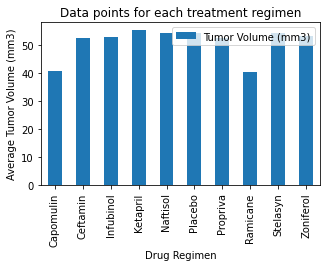

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
summaryDataFrame.plot(kind="bar", figsize=(5,3))
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()



<function matplotlib.pyplot.show(*args, **kw)>

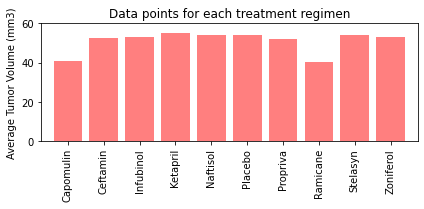

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_Axis = np.arange(len(summaryDataFrame))
tickLocations = [value for value in x_Axis]

plt.figure(figsize=(6,3))
plt.bar(x_Axis, summaryDataFrame["Tumor Volume (mm3)"], color="red",alpha =0.5)
plt.xticks(tickLocations, list(summaryDataFrame.index), rotation = "vertical")
plt.xlim(-0.75, len(x_Axis) - 0.25)
plt.ylim(0,60)
plt.title("Data points for each treatment regimen")
plt.xlabel=("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show


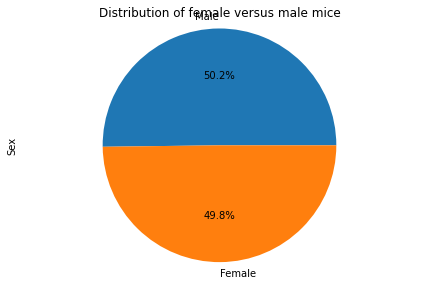

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count= mouse_metadata["Sex"].value_counts()
plt.figure()

mice_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

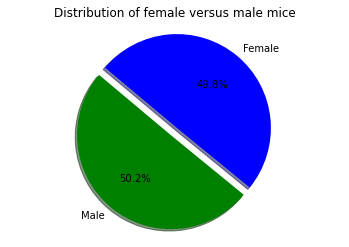

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["green","blue"]
explode = (.1,0)
plt.figure()
plt.pie(mice_count.values, explode=explode, labels=mice_count.index.values, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)

plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimenData = combine_data[(combine_data["Drug Regimen"] == "Capomulin") | 
                          (combine_data["Drug Regimen"] == "Ramicane") | 
                          (combine_data["Drug Regimen"] == "Infubinol") | 
                          (combine_data["Drug Regimen"] == "Ceftamin")]

regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimenDF["Tumor Volume (mm3)"]
regimenDF.head()

# quartile calculations
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


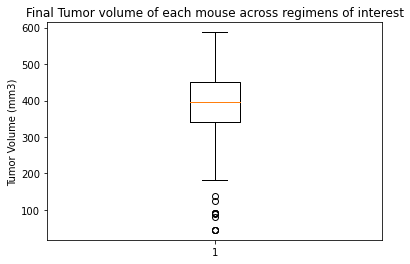

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, axl = plt.subplots()
axl.set_title("Final Tumor volume of each mouse across regimens of interest")
axl.set_ylabel("Tumor Volume (mm3)")
axl.boxplot(regimenPlot)
plt.show()

## Line and Scatter Plots

TypeError: 'str' object is not callable

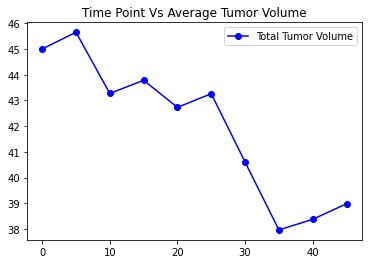

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_Data = combine_data[(combine_data["Drug Regimen"] == "Capomulin") & (combine_data["Mouse ID"] == "b128")]
tumor_Data = tumor_Data.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumor_Data["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumorTotal, = plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterData = combine_data[(combine_data["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
scatterDataDF = scatterDataDF.reset_index()
scatterDataDF.head()



,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


TypeError: 'str' object is not callable

<Figure size 432x288 with 0 Axes>

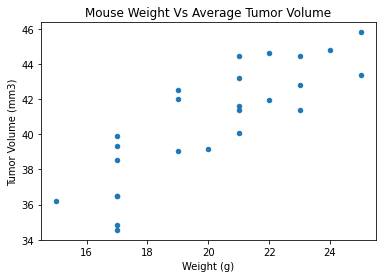

In [29]:
plt.figure()
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")

plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterDataDF["Weight (g)"], scatterDataDF["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


TypeError: 'str' object is not callable

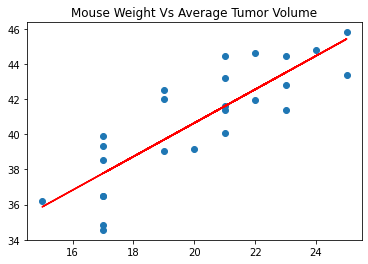

In [31]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatterDataDF["Weight (g)"]
y_values = scatterDataDF["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()